In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            im_folder = os.path.join(folder, file_class)

            for im in os.listdir(im_folder):
                img = cv2.imread(os.path.join(im_folder, im))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                img = cv2.resize(img, (196, 196))
                if img is not None:
               #     img = (img-np.mean(img))/np.std(img)
                    images.append((np.array(img), index)) 
    return images

In [3]:
image_train_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\train')
image_test_set = import_maps(r'D:\ILBS_14_8_21_Sanjeev\ILBS_Clustered_Volumes\test')

In [4]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [5]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
#test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [6]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(12900, 196*196))
train_images_array = train_images.reshape(12900, 196, 196, 1)

In [7]:
test_image = scalar.fit_transform(test_images_array.reshape(1950,196*196))
test_image_array = test_image.reshape(1950,196,196,1)

In [8]:
train_x, val_x, train_y, val_y = train_test_split(train_images_array,train_image_label,test_size=0.2)

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_y.reshape(-1, 1)).toarray()
val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [26]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Conv2D(input_shape=(196,196,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='fc1'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax', name='output'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(0.01),
               metrics=['accuracy'])

model.summary()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                            patience=10, min_lr=0.000001)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 196, 196, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 98, 98, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 98, 98, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 49, 49, 256)      

In [ ]:
history_wr = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=400, verbose=1,shuffle=True, callbacks = [reduce_lr])

Train on 10320 samples, validate on 2580 samples
Epoch 1/400
10320/10320 [==============================] - 66s 6ms/sample - loss: 1.5065 - accuracy: 0.3756 - val_loss: 1.4632 - val_accuracy: 0.3733: 1. - ETA: 48s - loss: 1.66 - ETA: 26  - ETA: 2s - loss: 1.5066  - ETA: 0s - loss: 1.5064 - accuracy
Epoch 2/400
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.4520 - accuracy: 0.3770 - val_loss: 1.4526 - val_accuracy: 0.3733ETA: 9s - lo - ETA: 7s - loss: 1.4528 - accuracy: 0.37 - ETA: 6s - loss: 1.4528 - accuracy: 0. - ETA: 6s - l - ETA: 3s - loss: - ETA: 1s - loss: 1.4526 - 
Epoch 3/400
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.4456 - accuracy: 0.3848 - val_loss: 1.4660 - val_accuracy: 0.3733- ETA: 42s - los - - ETA: 21s - loss: 1.451 - ETA: 17s - loss: 1. - ETA: 7s - loss: 1.4493 - accuracy:  - ETA: 6s - loss: 1.4485  - ETA: 5s - loss: 1.4478 -  - ETA: 3s - loss: 1.4464 - accuracy:  - ETA: 3s
Epoch 4/400
10320/10320 [================

10320/10320 [==============================] - 64s 6ms/sample - loss: 0.0364 - accuracy: 0.9757 - val_loss: 0.0360 - val_accuracy: 0.9705
Epoch 48/400
10320/10320 [==============================] - 64s 6ms/sample - loss: 0.0366 - accuracy: 0.9753 - val_loss: 0.0342 - val_accuracy: 0.97360s - loss: 0.0311 - accuracy: 0.9 - ETA: 50s - loss: 0.0299 - accuracy:  - ETA: 49s - loss: 0.0298 - accuracy: 0.97 - ET - ETA: 41s - lo - ETA: 35s -  - ETA: 30s - loss: 0.0368  - - ETA: 6s - loss: 0.0372 - accura - ETA: 5s - loss: 0.0371 - accuracy:  - ETA - ETA: 1s - loss: 0.0369 - ac
Epoch 49/400
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0357 - accuracy: 0.9762 - val_loss: 0.0358 - val_accuracy: 0.9717TA: 40s - los - ETA: 18s - loss: 0.0350 - accu - ETA: 4s - loss: 0.0357 -  - ETA: 
Epoch 50/400
10320/10320 [==============================] - 66s 6ms/sample - loss: 0.0352 - accuracy: 0.9779 - val_loss: 0.0361 - val_accuracy: 0.9709
Epoch 51/400
10320/10320 [==============

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0332 - accuracy: 0.9766 - val_loss: 0.0348 - val_accuracy: 0.9686- ETA: 49s - loss: 0.03 - ETA: 37s - los - ETA: 32s - loss: 0.0292 - accuracy: 0.98 - ETA: 32s - loss: 0.0293 - ETA: 20s - loss: 0.0304 - accura - ETA: 18s - loss: 0.0303 - accura - ETA: 16s - loss: 0.0311 -  - ETA
Epoch 95/400
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0337 - accuracy: 0.9770 - val_loss: 0.0348 - val_accuracy: 0.968637 - - ETA: 13s - loss: 0.0342 - accuracy: 0.9 - ETA: 12s - - ETA: 0s - loss: 0.0337 - accuracy: 0.97
Epoch 96/400
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.0351 - accuracy: 0.9776 - val_loss: 0.0348 - val_accuracy: 0.9686s - loss: 0.0348 - accurac - ETA: 30s - loss: 0.0353 - accu - ETA: 28s - loss: 0.034 - ETA: 24s - loss: 0.0343 - accuracy: - E - ETA: 4s - loss: 0.0 - ETA: 2s - los
Epoch 97/400
10320/10320 [==============================] - 65s 6ms/sample - loss

# Woth regularizer results

In [11]:
history = model.fit(train_x,train_label_enc,validation_data=(val_x,val_label_enc), batch_size=32, epochs=400, verbose=1,shuffle=True, callbacks = [reduce_lr])

Train on 10320 samples, validate on 2580 samples
Epoch 1/600
10320/10320 [==============================] - 80s 8ms/sample - loss: 1.5860 - accuracy: 0.3815 - val_loss: 1.5333 - val_accuracy: 0.3733
Epoch 2/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.5292 - accuracy: 0.3787 - val_loss: 1.5319 - val_accuracy: 0.3733ETA: 1s - loss: 1.5292 - ac
Epoch 3/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.5228 - accuracy: 0.3828 - val_loss: 1.5259 - val_accuracy: 0.3733loss: 1.5341 - accuracy:  -
Epoch 4/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.5147 - accuracy: 0.3811 - val_loss: 1.5124 - val_accuracy: 0.3733 ETA: 49s - loss: 1.5170 - accuracy: 0.383 - E - ETA: 41s - loss: 1.5154 - a - ETA:
Epoch 5/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 1.5014 - accuracy: 0.3858 - val_loss: 1.4958 - val_accuracy: 0.3833
Epoch 6/600
10320/10320 [==============================] - 65s 6

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1087 - accuracy: 0.9757 - val_loss: 0.1065 - val_accuracy: 0.9744
Epoch 52/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1088 - accuracy: 0.9763 - val_loss: 0.1084 - val_accuracy: 0.9733
Epoch 53/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1084 - accuracy: 0.9781 - val_loss: 0.1069 - val_accuracy: 0.9713
Epoch 54/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1081 - accuracy: 0.9778 - val_loss: 0.1072 - val_accuracy: 0.9756
Epoch 55/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1089 - accuracy: 0.9771 - val_loss: 0.1066 - val_accuracy: 0.9690
Epoch 56/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1084 - accuracy: 0.9774 - val_loss: 0.1064 - val_accuracy: 0.9729
Epoch 57/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1082 - accuracy: 0.976

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1049 - accuracy: 0.9766 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 105/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1039 - accuracy: 0.9781 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 106/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9783 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 107/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9770 - val_loss: 0.1056 - val_accuracy: 0.9678
Epoch 108/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1050 - accuracy: 0.9765 - val_loss: 0.1056 - val_accuracy: 0.9678
Epoch 109/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9778 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 110/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1040 - accuracy:

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1041 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 158/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1053 - accuracy: 0.9758 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 159/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1052 - accuracy: 0.9761 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 160/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1046 - accuracy: 0.9781 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 161/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 162/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9770 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 163/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy:

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 211/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9780 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 212/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9772 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 213/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9678: 39s - loss: 0.1023 - accuracy: 0 - ETA: 38s
Epoch 214/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1035 - accuracy: 0.9805 - val_loss: 0.1055 - val_accuracy: 0.9678- loss: 0.1044 - accuracy: 0
Epoch 215/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9776 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 216/600
10320/10320 [==

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1038 - accuracy: 0.9801 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 263/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1038 - accuracy: 0.9781 - val_loss: 0.1055 - val_accuracy: 0.96780.97 - ETA: 2s -
Epoch 264/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1038 - accuracy: 0.9798 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 265/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9783 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 266/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9789 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 267/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1036 - accuracy: 0.9792 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 268/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1045 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 314/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9678- ac - ETA: - - ETA: 17s - loss: 0.1025 - accu
Epoch 315/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9778 - val_loss: 0.1055 - val_accuracy: 0.9678s - loss: 0.1042 - accuracy: 0.
Epoch 316/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9776 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 317/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1039 - accuracy: 0.9785 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 318/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9763 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 319/600
10320/10320

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9778 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 364/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1036 - accuracy: 0.9797 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 365/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9772 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 366/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1046 - accuracy: 0.9769 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 367/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9781 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 368/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9787 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 369/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy:

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1045 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 415/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9794 - val_loss: 0.1055 - val_accuracy: 0.9678078 - accur - ETA: 44s - loss: 0.1077 - acc - ETA: 42s - los - ETA: 2s - l
Epoch 416/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9772 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 417/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 418/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1049 - accuracy: 0.9767 - val_loss: 0.1055 - val_accuracy: 0.9678: 53s - loss: 0.099 - ETA: 50s - loss - ETA: 45s - los
Epoch 419/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1050 - accuracy: 0.9775 - val_loss: 0.10

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1045 - accuracy: 0.9776 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 467/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1046 - accuracy: 0.9767 - val_loss: 0.1055 - val_accuracy: 0.9678acy: 0.97
Epoch 468/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9787 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 469/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9766 - val_loss: 0.1055 - val_accuracy: 0.967846s 
Epoch 470/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9771 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 471/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1047 - accuracy: 0.9772 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 472/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.104

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1053 - accuracy: 0.9757 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 519/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9764 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 520/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1041 - accuracy: 0.9789 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 521/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9783 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 522/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1041 - accuracy: 0.9797 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 523/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1046 - accuracy: 0.9779 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 524/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1044 - accuracy:

10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9775 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 571/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1045 - accuracy: 0.9774 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 572/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9783 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 573/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1048 - accuracy: 0.9784 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 574/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1043 - accuracy: 0.9773 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 575/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1042 - accuracy: 0.9778 - val_loss: 0.1055 - val_accuracy: 0.9678
Epoch 576/600
10320/10320 [==============================] - 65s 6ms/sample - loss: 0.1047 - accuracy:

In [12]:
score = model.evaluate(test_image_array,test_label_enc)

1950/1950 [==============================] - 5s 3ms/sample - loss: 8.0230 - accuracy: 0.3759


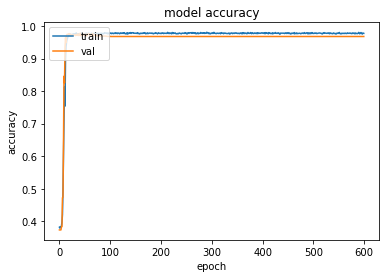

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

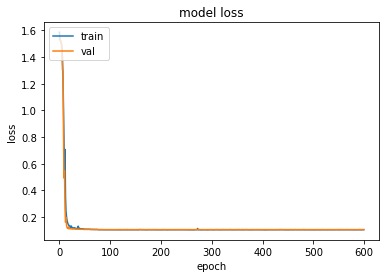

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
y_predict = model.predict(test_image_array)

In [16]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [17]:
from sklearn.metrics import *

In [18]:
confusion_matrix(test_image_label,y_predict_bool)

array([[ 92,   0,  37,  21,   0,   0],
       [112,   1,  35,  69,  55,  28],
       [ 52,  36, 301, 191,  20,   0],
       [ 13,  88,  56, 318, 125,   0],
       [  0,  23, 127,   0,   0,   0],
       [  0,   0,   0, 121,   8,  21]], dtype=int64)

In [19]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.34      0.61      0.44       150
           1       0.01      0.00      0.00       300
           2       0.54      0.50      0.52       600
           3       0.44      0.53      0.48       600
           4       0.00      0.00      0.00       150
           5       0.43      0.14      0.21       150

    accuracy                           0.38      1950
   macro avg       0.29      0.30      0.28      1950
weighted avg       0.36      0.38      0.36      1950



In [25]:
fpr,tpr,thresholds = roc_curve(test_image_label,y_predict_bool,pos_label=5)
print(auc(fpr,tpr))

0.7587203703703703


In [22]:
precision_score(test_image_label,y_predict_bool,average='weighted')

0.36278666689193284

In [23]:
recall_score(test_image_label,y_predict_bool,average='weighted')

0.3758974358974359